In [2]:
import numpy as np
import pandas as pd
np.random.seed(666)

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, cross_validate, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import ks_2samp, chisquare

In [5]:
pd.set_option('display.max_columns', 200)

In [6]:
train = pd.read_csv('data/application_train.csv', index_col='SK_ID_CURR')
y = train['TARGET']
train.drop(columns=['TARGET'], inplace=True)
print(train.shape)
train.head()

(307511, 120)


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN

In [7]:
y

SK_ID_CURR
100002    1
100003    0
100004    0
100006    0
100007    0
         ..
456251    0
456252    0
456253    0
456254    1
456255    0
Name: TARGET, Length: 307511, dtype: int64

In [8]:
test = pd.read_csv('data/application_test.csv', index_col='SK_ID_CURR')
print(test.shape)
test.head()

(48744, 120)


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
100028,Cas

# Investigation

## Pearson Correlation

In [9]:
# plt.figure(figsize=(12,10))
# cor = train.corr()
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()

## Отношение Nan для каждого из признаков

In [10]:
nans = pd.Series(dtype='float64')
for column in train.columns:
    nan = train[column].isna().sum()
    count = train[column].count()
    nans.loc[column] = nan/count

<AxesSubplot:>

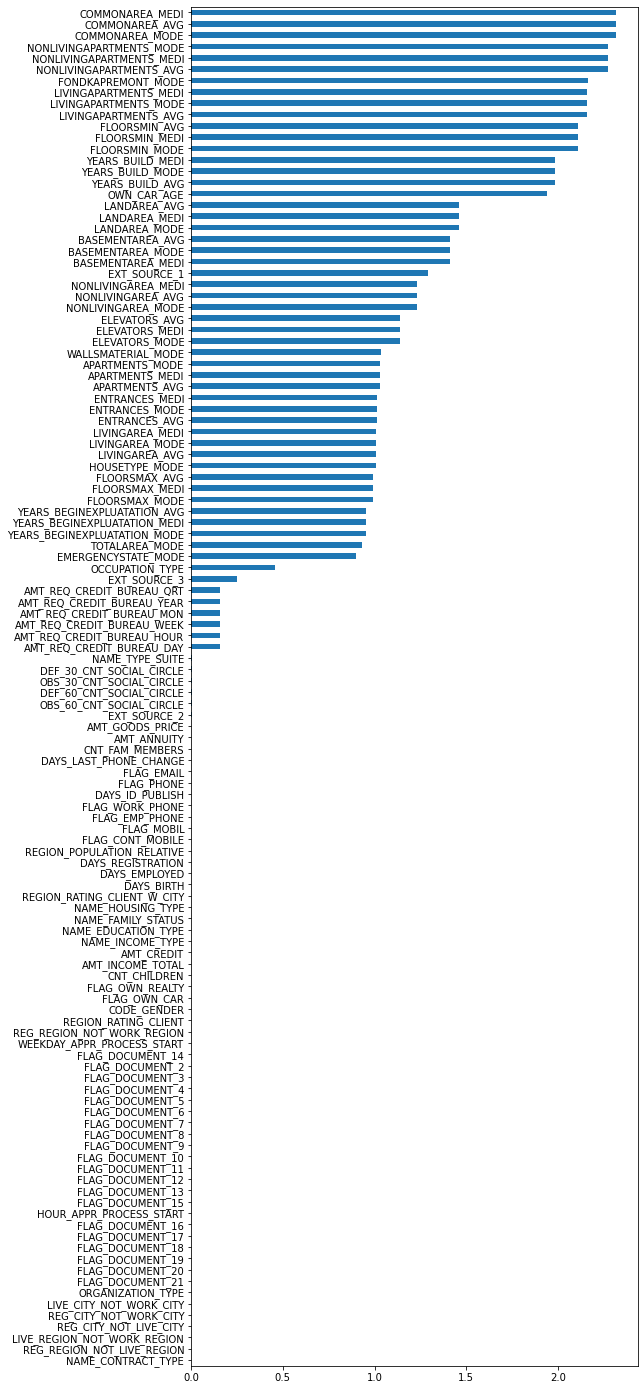

In [11]:
nans.sort_values().plot(kind='barh', figsize =(8, 25))

# Preprocessing

## NAN delete

In [12]:
nans.loc[nans > 0.5].index

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

In [10]:
# train.drop(columns=nans.loc[nans > 0.5].index, inplace=True)
# test.drop(columns=nans.loc[nans > 0.5].index, inplace=True)

## NAN replacement

In [13]:
data = pd.concat((train, test), keys=('train', 'test'))
for column in train.columns:
    if train[column].dtype == np.dtype('object'):
        mode = data[column].mode(dropna=True).iloc[0]
        train[column] = train[column].fillna(mode)
        test[column] = test[column].fillna(mode)
    else:
        mean = data[column].mean()
        train[column] = train[column].fillna(mean)
        test[column] = test[column].fillna(mean)

## Categorical features 

In [14]:
data = pd.concat((train, test), keys=('train', 'test'))
data = pd.get_dummies(data, drop_first=True)
data

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
      SK_ID_CURR                                                            
train 100002                 0          202500.0    406597.5      24700.5   
      100003                 0          270000.0   1293502.5      35698.5   
      100004                 0           67500.0    135000.0       6750.0   
      100006                 0          135000.0    312682.5      29686.5   
      100007                 0          121500.0    513000.0      21865.5   
...                        ...               ...         ...          ...   
test  456221                 0          121500.0    412560.0      17473.5   
      456222                 2          157500.0    622413.0      31909.5   
      456223                 1          202500.0    315000.0      33205.5   
      456224                 0          225000.0    450000.0      25128.0   
      456250                 0          135000.0    312768.0      24709.5   

                  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
      SK_ID_CURR                                                            
train 100002             351000.0                    0.018801       -9461   
      100003            1129500.0                    0.003541      -16765   
      100004             135000.0                    0.010032      -19046   
      100006             297000.0                    0.008019      -19005   
      100007             513000.0                    0.028663      -19932   
...                           ...                         ...         ...   
test  456221             270000.0                    0.002042      -19970   
      456222             495000.0                    0.035792      -11186   
      456223             315000.0                    0.026392      -15922   
      456224             450000.0                    0.018850      -13968   
      456250             270000.0                    0.006629      -13962   

                  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
      SK_ID_CURR                                                      
train 100002               -637            -3648.0            -2120   
      100003              -1188            -1186.0             -291   
      100004               -225            -4260.0            -2531   
      100006              -3039            -9833.0            -2437   
      100007              -3038            -4311.0            -3458   
...                         ...                ...              ...   
test  456221              -5169            -9094.0            -3399   
      456222              -1149            -3015.0            -3003   
      456223              -3037            -2681.0            -1504   
      456224              -2731            -1461.0            -1364   
      456250               -633            -1072.0            -4220   

                  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
      SK_ID_CURR                                                             
train 100002        12.023741           1               1                0   
      100003        12.023741           1               1                0   
      100004        26.000000           1               1                1   
      100006        12.023741           1               1                0   
      100007        12.023741           1               1                0   
...                       ...         ...             ...              ...   
test  456221        12.023741           1               1                1   
      456222        12.023741           1               1                0   
      456223         4.000000           1               1                0   
      456224        12.023741           1               1                1   
      456250        22.000000           1               1                1   

                  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS

In [15]:
train = data.loc['train']
test = data.loc['test']

## VarianceThreshold

In [16]:
# variance = VarianceThreshold(threshold=0.1)
# variance.fit(train, y)
# variance_mask = variance.get_support()
# variance_drop = [name for name, mask in zip(train.columns.values, variance_mask) if mask == False]
variance_drop = []

In [17]:
variance_drop

[]

# Preprocessing

## VarianceThreshold

In [18]:
train.drop(columns=variance_drop, inplace=True)
test.drop(columns=variance_drop, inplace=True)

/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Investigation

## Pearson Correlation

In [17]:
# plt.figure(figsize=(12,10))
# cor = train.corr()
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()

# Preprocessing

## Remove outliers and normalize

In [19]:
columns = train.columns

In [20]:
data = pd.concat((train, test), keys=('train', 'test'))

transformer = PowerTransformer()
scaler = StandardScaler()

scaler.fit(data)
train_n = scaler.transform(train)
test_n = scaler.transform(test)
data_n = scaler.transform(data)
transformer.fit(data_n)


train_t = transformer.transform(train_n)
test_t = transformer.transform(test_n)

In [21]:
train = pd.DataFrame(train_t, columns=columns)
test = pd.DataFrame(test_t, columns=columns)

# Decision tree

## Взять три гиперпараметра для решающего дерева, и для каждого проварьировать один из них, фиксирую остальные

In [ ]:
params = {
    'max_depth': [None, 2, 3, 5, 10, 20],
    'splitter': ["best", "random"],
    'max_leaf_nodes': [None, 10, 50, 100, 300, 600]
}

In [61]:
scores = []
model = DecisionTreeClassifier()
for name, param in params.items():
    gs = GridSearchCV(model, {name: param}, scoring='roc_auc', cv=3, n_jobs=-1)
    gs.fit(train, y)
    scores.append(pd.DataFrame([list(gs.cv_results_["mean_test_score"])], columns=param, index=[name]))
    print(scores[-1])

                NaN         2        3        5        10        20
max_depth  0.541304  0.647109  0.68258  0.70594  0.709741  0.590269
              best    random
splitter  0.540401  0.535569
                    NaN        10        50       100       300       600
max_leaf_nodes  0.54025  0.691306  0.713184  0.714835  0.712546  0.707107


###  Построить графики зависимости метрики на кросс-валидации от параметра. 

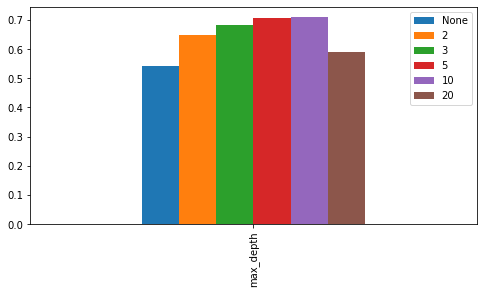

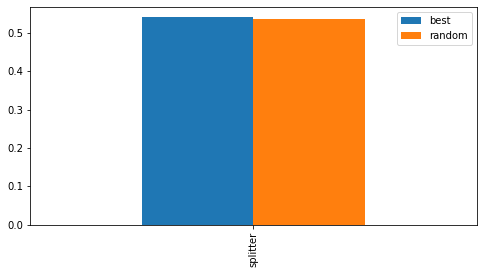

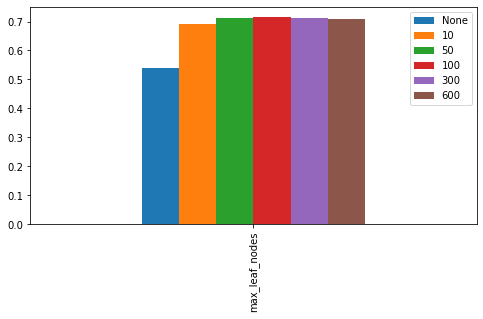

In [62]:
for score in scores:
    score.plot(kind='bar', figsize =(8, 4))

## Сделать с помощью GridSearchCV и RandomizedSearchCV отбор наилучших параметров для решающего дерева

In [83]:
model = DecisionTreeClassifier()

In [98]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'max_leaf_nodes': [10, 50, 100, 300, 600]
}

In [86]:
gs = GridSearchCV(model, params, scoring='roc_auc', cv=3, n_jobs=-1, verbose=10)
gs.fit(train, y)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'max_leaf_nodes': [10, 50, 100, 300, 600]},
             scoring='roc_auc', verbose=10)

In [90]:
rs = RandomizedSearchCV(model, params, scoring='roc_auc', cv=3, n_jobs=-1, verbose=10)
rs.fit(train, y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 5, 10, 20],
                                        'max_leaf_nodes': [10, 50, 100, 300,
                                                           600]},
                   scoring='roc_auc', verbose=10)

### Какие параметры дают наилучший результат?

In [91]:
gs.best_params_, gs.best_score_

({'max_depth': 10, 'max_leaf_nodes': 100}, 0.7151494091241136)

In [92]:
rs.best_params_, rs.best_score_

({'max_leaf_nodes': 100, 'max_depth': 10}, 0.7151493717187214)

## Аналогично сделать пункты 0-1 для cлучайного леса 

In [22]:
params = {
    'max_depth': [None, 2, 3, 5, 10, 20],
    'n_estimators': [5, 10, 50, 100, 200],
    'max_leaf_nodes': [None, 10, 50, 100, 300, 600]
}

In [23]:
scores = []
model = RandomForestClassifier()
for name, param in params.items():
    print({name: param})
    gs = GridSearchCV(model, {name: param}, scoring='roc_auc', cv=3, n_jobs=-1)
    gs.fit(train, y)
    scores.append(pd.DataFrame([list(gs.cv_results_["mean_test_score"])], columns=param, index=[name]))
    print(scores[-1])

{'max_depth': [None, 2, 3, 5, 10, 20]}
                NaN         2         3         5        10        20
max_depth  0.710024  0.711261  0.712752  0.720636  0.733547  0.727266
{'n_estimators': [5, 10, 50, 100, 200]}
                   5         10        50        100      200
n_estimators  0.593237  0.630616  0.693597  0.709758  0.71916
{'max_leaf_nodes': [None, 10, 50, 100, 300, 600]}
                     NaN        10        50       100       300       600
max_leaf_nodes  0.709801  0.720934  0.728346  0.729088  0.733255  0.733956


###  Построить графики зависимости метрики на кросс-валидации от параметра. 

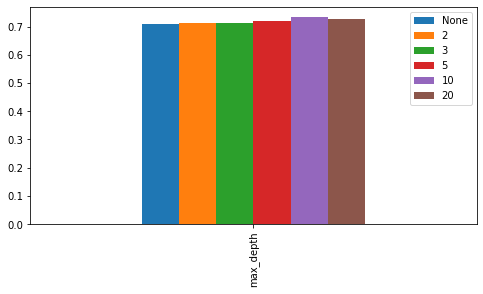

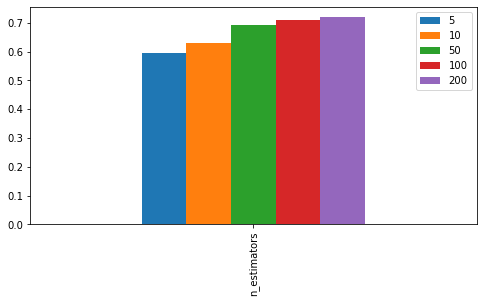

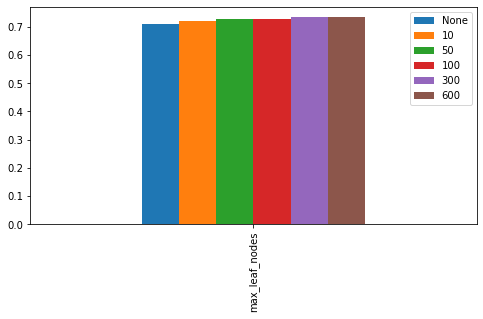

In [24]:
for score in scores:
    score.plot(kind='bar', figsize =(8, 4))

## Сделать с помощью GridSearchCV и RandomizedSearchCV отбор наилучших параметров для случайного леса

In [25]:
model = RandomForestClassifier()

In [26]:
params = {
    'max_depth': [10, 15, 20],
    'n_estimators': [100, 200, 300],
    'max_leaf_nodes': [100, 300, 600]
}

In [27]:
gs = GridSearchCV(model, params, scoring='roc_auc', cv=3, n_jobs=-1, verbose=10)
gs.fit(train, y)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20],
                         'max_leaf_nodes': [100, 300, 600],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=10)

In [ ]:
rs = RandomizedSearchCV(model, params, scoring='roc_auc', cv=3, n_jobs=-1, verbose=10)
rs.fit(train, y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


### Какие параметры дают наилучший результат?

In [ ]:
gs.best_params_, gs.best_score_

In [ ]:
rs.best_params_, rs.best_score_

## С помощью случайного леса получить оценку важности признаков. Какие признаки влияют больше всего на результат?

In [ ]:
important_feature = pd.DataFrame(rs.best_estimator_.feature_importances_, index=train.columns).sort_values(0, ascending=False)
important_feature.head(10)

## Теперь отберите только 5 самых важных и постройте модель только на них.

In [68]:
five_important_features = important_feature.index[:5]
five_train = train[five_important_features]

NameError: name 'important_feature' is not defined

In [ ]:
model = RandomForestClassifier(*rs.best_params_)

In [ ]:
cross_val_score(model, five_train, y, cv=3, scoring='roc_auc')

## Как изменилась метрика на кросс-валидации?

## Постройте модель на M-1 признаке, исключая самый важный

In [69]:
four_important_features = important_feature.index[1:5]
four_train = train[five_important_features]

NameError: name 'important_feature' is not defined

In [70]:
model = RandomForestClassifier(*rs.best_params_)

NameError: name 'RandomForestClassifier' is not defined

In [71]:
cross_val_score(model, four_train, y, cv=5, scoring='roc_auc')

NameError: name 'four_train' is not defined

## Как изменилась метрика на кросс-валидации? 